<a href="https://colab.research.google.com/github/SanjanaS183/Fake-new-detection/blob/main/Fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 10241 rawData, 0 trainData, 0 testData
Preparing training and test data...
After split, 10241 rawData, 8192 trainData, 2049 testData
Training Samples: 
8192
Features: 
13398
Fold start on items 0 - 820
Training Classifier...
Fold start on items 820 - 1640
Training Classifier...
Fold start on items 1640 - 2460
Training Classifier...
Fold start on items 2460 - 3280
Training Classifier...
Fold start on items 3280 - 4100
Training Classifier...
Fold start on items 4100 - 4920
Training Classifier...
Fold start on items 4920 - 5740
Training Classifier...
Fold start on items 5740 - 6560
Training Classifier...
Fold start on items 6560 - 7380
Training Classifier...
Fold start on items 7380 - 8200
Training Classifier...
The Precision, recall, fscore and accuracy respectively are: [0.5537824085310199, 0.553376787216148, 0.5531942430166763, 0.553376787216148]


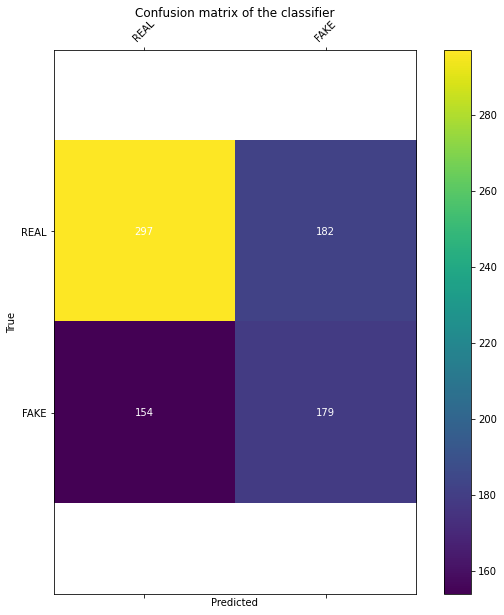

The false negative and false positive values are  [154 179]
Training Classifier...
False positive and False negative values for one fold of validation dataset are  182 180


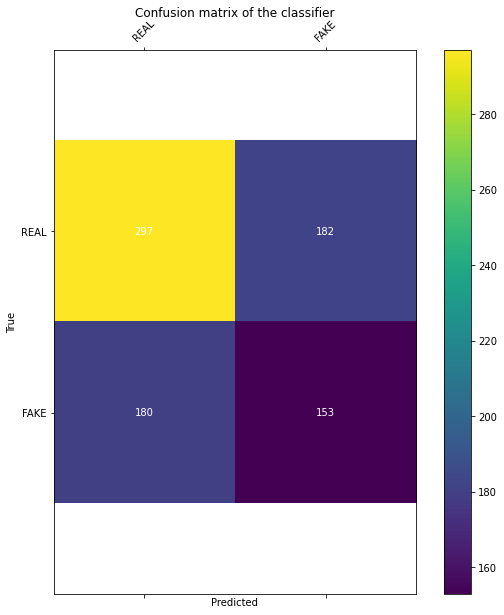

Variance:  0.0
Bias:  1.0
({'bush': 1, 'tax': 1, 'cut': 1, 'helped': 1, 'createsubstantial': 1, 'part': 1, 'deficit': 1}, 'REAL')
Training Classifier...
Done training!
Precision: 0.544780
Recall: 0.546120
F Score:0.545318
Accuracy 0.5461200585651538


In [10]:
!pip install nltk
import csv   
from sklearn import metrics                            # csv reader
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support # to report on precision and recall
import numpy as np
import re
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import svm
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('all')
import warnings
warnings.filterwarnings("ignore")  
from sklearn.metrics import accuracy_score
def load_data(path):
    """Load data from a tab-separated file and append it to raw_data."""
    with open(path) as f:
        reader = csv.reader(f, delimiter='\t')
        for line in reader:
            if line[0] == "Id":  # skip header
                continue
            (label, text) = parse_data_line(line)

            raw_data.append((text, label))
  
            
    return raw_data


def split_and_preprocess_data(percentage):
    """Split the data between train_data and test_data according to the percentage
    and performs the preprocessing."""
    num_samples = len(raw_data)
    num_training_samples = int((percentage * num_samples))
    for (text, label) in raw_data[:num_training_samples]:
        train_data.append((to_feature_vector(pre_process(text)),label))
    for (text, label) in raw_data[num_training_samples:]:
        test_data.append((to_feature_vector(pre_process(text)),label))
def convert_label(label):
    """Converts the multiple classes into two,
    making it a binary distinction between fake news and real."""
    #return label
    # Converting the multiclass labels to binary label
    labels_map = {
        'true': 'REAL',
        'mostly-true': 'REAL',
        'half-true': 'REAL',
        'false': 'FAKE',
        'barely-true': 'FAKE',
        'pants-fire': 'FAKE'
    }
    return labels_map[label]


def parse_data_line(data_line):
    # Should return a tuple of the label as just FAKE or REAL and the statement
    # e.g. (label, statement)
    
    #calling convert_label function to get label
    label1 = convert_label(data_line[1])
   
    return(label1, data_line[2])
    
def pre_process(text):
  text = re.sub(r'[^\w\s]','',text)
  text = re.sub(r'\^[a-zA-Z]\s+', '', text)
  text = re.sub(r'\s+[a-zA-Z]\s+', '', text)
  text = re.sub(r'\d+', '', text)
  text = re.sub(r'\s+', ' ', text, flags=re.I)
  token = re.split(r"\s+",text)# \s- white space
  # normalisation - only by lower casing for now
  token = [t.lower() for t in token]
  stops = set(stopwords.words("english"))
  lemmatizer = WordNetLemmatizer()
  token = [lemmatizer.lemmatize(word) for word in token if not word in stops]
  return token
  # Should return a list of tokens

global_feature_dict = {}
def to_feature_vector(tokens):
 # Should return a dictionary containing features as keys, and weights as values
 feature_dict = {}  # local feature vector in dict form
 for w in tokens:
      #searching if in dict
      if w not in global_feature_dict:
        global_feature_dict[w]=len(global_feature_dict)+1
      if w in feature_dict:
        #add weight based on occurrence
        feature_dict[w] = feature_dict[w] +1
      else:
        #assigning 1 to word weight
        feature_dict[w] = 1
        
 return feature_dict


# TRAINING AND VALIDATING OUR CLASSIFIER
def train_classifier(data):
    print("Training Classifier...")
    pipeline =  Pipeline([('svc', LinearSVC(C=2))])
    return SklearnClassifier(pipeline).train(data)



def cross_validate(dataset, folds):
    Results = []
    global fold_size
    fold_size = int(len(dataset)/folds)+1
    sum =0
    for i in range(0,len(dataset),int(fold_size)):
        print("Fold start on items %d - %d" % (i, i+fold_size))
        global myValData
        #myValData is a diagonal over the iterations
        myValData = dataset[i:i+fold_size]
        global myTrainData
        myTrainData = dataset[:i] + dataset[i+fold_size:]
        #training the train data
        classifier1 = train_classifier(myTrainData)
        global y_true
        #y_true - true label which is in second position in tuple
        y_true = [x[1] for x in myValData]
        y_data = [x[0] for x in myValData]
        global preds
        #predicting test value
        preds = predict_labels(y_data, classifier1 )
        Results.append(precision_recall_fscore_support(y_true, preds, average='weighted'))
        accuracy = metrics.accuracy_score(y_true, preds)
        #calculating sum for each iteration
        sum = accuracy+ sum
    CV_results = [np.mean([x[0] for x in Results]),
                   np.mean([x[1] for x in Results]),
                   np.mean([x[2] for x in Results])]
    accuracy = sum/folds
    CV_results.append(accuracy)
    return CV_results


# PREDICTING LABELS GIVEN A CLASSIFIER

def predict_labels(samples, classifier):
    """Assuming preprocessed samples, return their predicted labels from the classifier model."""
    return classifier.classify_many(samples)

def predict_label_from_raw(sample, classifier):
    """Assuming raw text, return its predicted label from the classifier model."""
    return classifier.classify(to_feature_vector(pre_process(sample)))


# MAIN

# loading reviews
# initialize global lists that will be appended to by the methods below
raw_data = []          # the filtered data from the dataset file
train_data = []        # the pre-processed training data as a percentage of the total dataset
test_data = []         # the pre-processed test data as a percentage of the total dataset


# references to the data files
data_file_path = 'fake_news.tsv'

# Do the actual stuff (i.e. call the functions we've made)
# We parse the dataset and put it in a raw data list
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing the dataset...",sep='\n')
load_data(data_file_path) 

# We split the raw dataset into a set of training data and a set of test data (80/20)
# You do the cross validation on the 80% (training data)
# We print the number of training samples and the number of features before the split
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing training and test data...",sep='\n')

split_and_preprocess_data(0.8)
# We print the number of training samples and the number of features after the split
print("After split, %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Training Samples: ", len(train_data), "Features: ", len(global_feature_dict), sep='\n')

CV_results = cross_validate(train_data, 10) 
print("The Precision, recall, fscore and accuracy respectively are:",CV_results) 
# will work and output overall performance of p, r, f-score when cv implemented

from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
# a function to make the confusion matrix readable and pretty
def confusion_matrix_heatmap(y_test, preds, labels):
    """Function to plot a confusion matrix"""
    # pass labels to the confusion matrix function to ensure right order
    global cm 
    cm = metrics.confusion_matrix(y_test, preds, labels = labels)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # fix for mpl bug that cuts off top/bottom of seaborn viz:
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    plt.show()

confusion_matrix_heatmap(y_true, preds, labels = ['REAL','FAKE'])
print("The false negative and false positive values are ",cm[1])

from sklearn import metrics
#considering one fold of data
myValData_1 = myValData[0:(fold_size)]
myTrainData_1 = myTrainData[0:(fold_size)]
#classifier for onlyy one fold
classifier11 = train_classifier(myTrainData_1)
y_true1 = [x[1] for x in myValData_1]
y_data1 = [x[0] for x in myValData_1]
preds1 = predict_labels(y_data1, classifier11 )
cm11 = metrics.confusion_matrix(y_true1, preds1,labels = ['REAL','FAKE'])
print("False positive and False negative values for one fold of validation dataset are ",cm11[0][1], cm11[1][0])
confusion_matrix_heatmap(y_true1, preds1, labels = ['REAL','FAKE'])

#predicting variance and bias
for y_test_v in y_true1:
  #one if true- converting it to 0 and 1
 y_test_v = (y_test_v == 'REAL') + 0
for preds_v in preds1:
 preds_v = (preds_v == 'REAL') + 0
preds_v = np.asarray(preds_v)
y_test_v = np.asarray(y_test_v)
variance = np.var(preds_v)
print("Variance: ", variance)
SSE= np.mean((np.mean(preds_v)- y_test_v)**2)
Bias = SSE - variance
print("Bias: ",Bias)

# Finally, check the accuracy of your classifier by training on all the traning data
# and testing on the test set
# Will only work once all functions are complete
functions_complete = True  # set to True once you're happy with your methods for cross val
if functions_complete:
    print(test_data[0])   # have a look at the first test data instance
    classifier = train_classifier(train_data)  # train the classifier
    test_true = [t[1] for t in test_data]   # get the ground-truth labels from the data
    test_pred = predict_labels([x[0] for x in test_data], classifier)  # classify the test data to get predicted labels
    final_scores = precision_recall_fscore_support(test_true, test_pred, average='weighted') # evaluate
    print("Done training!")
    print("Precision: %f\nRecall: %f\nF Score:%f" % final_scores[:3])
    accuracy = metrics.accuracy_score(test_true, test_pred)
    print("Accuracy", accuracy)